In [2]:
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
#import argparse
import cv2


Using TensorFlow backend.


In [3]:
#construct argument parse
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True, help = "path to the input image")
#ap.add_argument("-model", "--model", type=str, default="xception", help="name of pre-trained network to use")
#args = vars(ap.parse_args())

#define dictionary mapping model to classes inside Keras
MODELS = {"vgg16": VGG16, "vgg19": VGG19, "inception": InceptionV3, "xception": Xception, "resnet": ResNet50}
mod = "xception"

#ensure valid model name supplied
#if args["model"] not in MODELS.keys():
#	raise AssertionError("The --model command line should be a key in the 'MODELS' dictionary")

#input shape
inputShape = (224,224)
preprocess = imagenet_utils.preprocess_input

if mod in ("inception", "xception"):
    inputShape = (299,299)
    preprocess = preprocess_input

#if args["model"] in ("inception", "xception"):
#	inputShape = (299,299)
#	preprocess = preprocess_input

#pretrained models
print("[INFO] loading {}...".format(mod))
Network = MODELS[mod]
model=Network(weights="imagenet")

[INFO] loading xception...


In [4]:
image_path = "cat.jpg"

print("[INFO] loading and pre-processing images...")
image = load_img(image_path,target_size=inputShape)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess(image)

[INFO] loading and pre-processing images...


In [5]:
#classify the image
print("[INFO] classifying image with '{}'...".format(mod))
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds)


[INFO] classifying image with 'xception'...


In [6]:

# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
	print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

1. tiger_cat: 44.15%
2. Egyptian_cat: 19.57%
3. tabby: 13.69%
4. lynx: 1.21%
5. plastic_bag: 0.24%


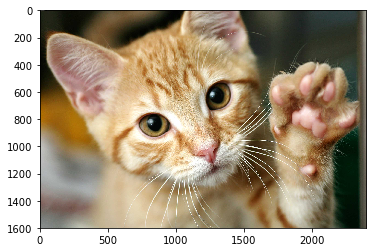

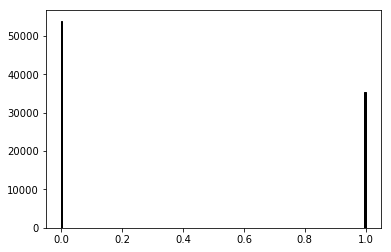

n02123159 tiger_cat 0.441525


In [7]:
#Load Images

%matplotlib inline
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img2=mpimg.imread(image_path)
plt.imshow(img2)
plt.show()

plt.hist(img2.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()

(imagenetID, label, prob) = P[0][0]
print(imagenetID, label, prob)

